In [1]:
import numpy as np
import nibabel as nib
import glob
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt 
from tifffile import imsave
from sklearn.preprocessing import MinMaxScaler

In [2]:
scaler = MinMaxScaler()

<h1>Testing The Data to make a base for data conversion for fitting the model

In [3]:
training_path = "BraTS2020_TrainingData\\MICCAI_BraTS2020_TrainingData\\"

In [4]:
#Showing the max number of pixels a image has and the dimensions of the image
test_image_flair = nib.load(training_path+ '\\BraTS20_Training_355\\BraTS20_Training_355_flair.nii').get_fdata()
print("Image_Dimensions: ",test_image_flair.shape)
print("Maximum Number of pixels: ",test_image_flair.max())

Image_Dimensions:  (240, 240, 155)
Maximum Number of pixels:  1854.603271484375


In [5]:
print(test_image_flair)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [6]:
#Flattening the 3D volume into 1D then again scaling it into 3D
#Converted the maximum pixel value to 1 and minimum to 0
test_image_flair = scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)
print("Image_Dimensions: ",test_image_flair.shape)
print("Maximum Number of pixels: ",test_image_flair.max())

Image_Dimensions:  (240, 240, 155)
Maximum Number of pixels:  1.0


In [7]:
#Repeating the Same process for other images in folder 355
#t1 image
test_image_t1 = nib.load(training_path+ '\\BraTS20_Training_355\\BraTS20_Training_355_t1.nii').get_fdata()
test_image_t1 = scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)
print("T1 Image_Dimensions: ",test_image_t1.shape)
print("T1 Maximum Number of pixels: ",test_image_t1.max())

#t1ce image
test_image_t1ce = nib.load(training_path+ '\\BraTS20_Training_355\\BraTS20_Training_355_t1ce.nii').get_fdata()
test_image_t1ce = scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)
print("T1ce Image_Dimensions: ",test_image_t1ce.shape)
print("T1ce Maximum Number of pixels: ",test_image_t1ce.max())

#t2 image
test_image_t2 = nib.load(training_path+ '\\BraTS20_Training_355\\BraTS20_Training_355_t2.nii').get_fdata()
test_image_t2 = scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)
print("T2 Image_Dimensions: ",test_image_t2.shape)
print("T2 Maximum Number of pixels: ",test_image_t2.max())

T1 Image_Dimensions:  (240, 240, 155)
T1 Maximum Number of pixels:  1.0
T1ce Image_Dimensions:  (240, 240, 155)
T1ce Maximum Number of pixels:  1.0
T2 Image_Dimensions:  (240, 240, 155)
T2 Maximum Number of pixels:  1.0


In [8]:
#The mask or segmentation image we need not to scale the mask
test_mask = nib.load(training_path+ '\\BraTS20_Training_355\\BraTS20_Training_355_seg.nii').get_fdata()
#All unique value in the mask array is given in a floating type64 format converting all into int
test_mask = test_mask.astype(np.uint8)

print(np.unique(test_mask))

[0 1 2 4]


In [9]:
# The unique value came 0 1 2 and 4. Since 3 is missing reassign the values in 4 to 3
test_mask[test_mask==4] = 3
print(np.unique(test_mask))

[0 1 2 3]


Randomly Plotting image slices to check the amount of data and information present in the image

Text(0.5, 1.0, 'Image mask')

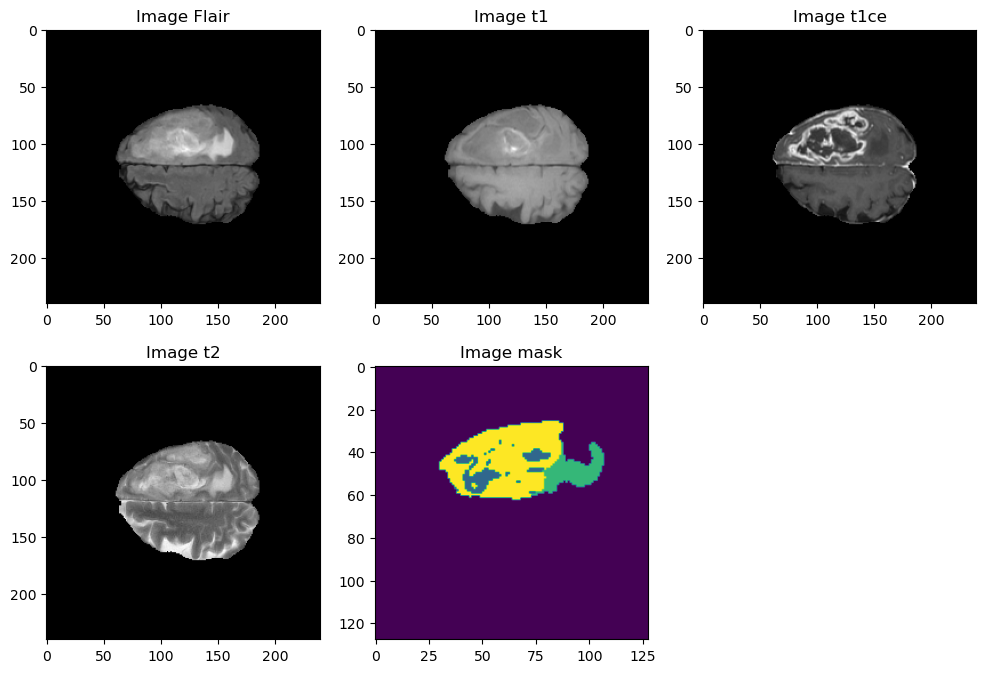

In [20]:
import random
#Generating a random integer between 0 and number of slices in the test mask and stoting in n_slices
n_slices = random.randint(0,test_mask.shape[2])

plt.figure(figsize=(12,8))

plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slices],cmap = 'gray')
plt.title("Image Flair")

plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slices],cmap = 'gray')
plt.title("Image t1")

plt.subplot(233)
plt.imshow(test_image_t1ce[:,:,n_slices],cmap = 'gray')
plt.title("Image t1ce")

plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slices],cmap = 'gray')
plt.title("Image t2")


plt.subplot(235)
plt.imshow(test_mask[:,:,n_slices])
plt.title("Image mask")

Combining 3 volumes of data i.e., image_flair, t1_ce and t2 into a sigle 3D volume to help in training the model

In [11]:
combined_x = np.stack([test_image_flair,test_image_t1ce,test_image_t2],axis = 3)

Cropping the image

In [12]:
"""We have a volume of 240*240*155 but most of the space in the images are blank and contains no data 
which takes extra resources while training and also makes the model a lot biased so we need to crop the 
image into 128*128*128 volume"""

combined_x = combined_x[56:184, 56:184, 13:141]#crop to 128*128*128
print(combined_x.shape)

(128, 128, 128, 3)


In [13]:
test_mask = test_mask[56:184, 56:184, 13:141]
print(test_mask.shape)

(128, 128, 128)


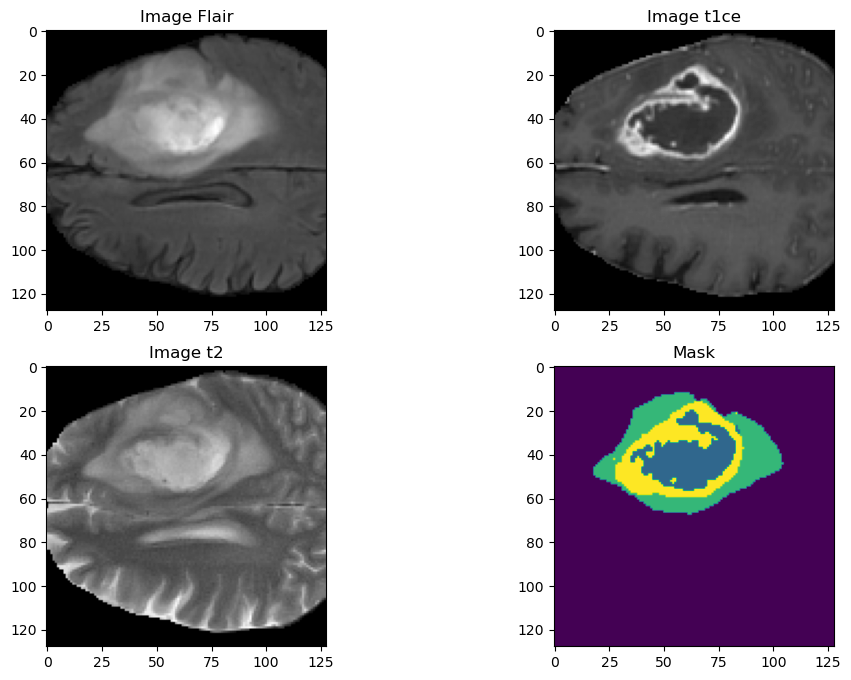

In [14]:
#Plotting again random axis

n_slice = random.randint(0,test_mask.shape[2])
plt.figure(figsize=(12,8))

plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 0],cmap='gray')
plt.title('Image Flair')
plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 1],cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 2],cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()


<h1>   Convert the whole dataset

In [7]:
#Getting all images and sorting them in their respective list
t2_list = sorted(glob.glob('BraTS2020_TrainingData\\MICCAI_BraTS2020_TrainingData\\*\\*t2.nii'))
t1ce_list = sorted(glob.glob('BraTS2020_TrainingData\\MICCAI_BraTS2020_TrainingData\\*\\*t1ce.nii'))
flair_list = sorted(glob.glob('BraTS2020_TrainingData\\MICCAI_BraTS2020_TrainingData\\*\\*flair.nii'))
mask_list = sorted(glob.glob('BraTS2020_TrainingData\\MICCAI_BraTS2020_TrainingData\\*\\*seg.nii'))

In [8]:
for img in range(len(t2_list)):
    print("Now preparing image and masks number: ",img)
    
    temp_image_t2 = nib.load(t2_list[img]).get_fdata()
    temp_image_t2 = scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
    
    temp_image_t1ce = nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce = scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
    
    temp_image_flair = nib.load(flair_list[img]).get_fdata()
    temp_image_flair = scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
    
    temp_mask = nib.load(mask_list[img]).get_fdata()
    temp_mask = temp_mask.astype(np.uint8)
    temp_mask[temp_mask==4] = 3
    
    temp_combined_images = np.stack([temp_image_t2, temp_image_t1ce, temp_image_flair],axis = 3)
    
    temp_combined_images = temp_combined_images[56:184, 56:184, 13:141]
    temp_mask = temp_mask[56:184, 56:184, 13:141]
    #This line returns the unique values and the count of unique values in the masks
    val, counts = np.unique(temp_mask, return_counts=True)
    
    if(1-(counts[0]/counts.sum())) > 0.01: #takes atleast masks with 1% useful information
        print("Save Me")
        temp_mask = to_categorical(temp_mask, num_classes=4)
        np.save('BraTS2020_TrainingData\\input_data_3channels\\images\\image_'+str(img)+'.npy', temp_combined_images)
        np.save('BraTS2020_TrainingData\\input_data_3channels\\masks\\masks_'+str(img)+'.npy', temp_mask)
    else:
        print("I am Useless")
        
        

Now preparing image and masks number:  0
Save Me
Now preparing image and masks number:  1
Save Me
Now preparing image and masks number:  2
Save Me
Now preparing image and masks number:  3
Save Me
Now preparing image and masks number:  4
I am Useless
Now preparing image and masks number:  5
Save Me
Now preparing image and masks number:  6
Save Me
Now preparing image and masks number:  7
Save Me
Now preparing image and masks number:  8
Save Me
Now preparing image and masks number:  9
Save Me
Now preparing image and masks number:  10
Save Me
Now preparing image and masks number:  11
Save Me
Now preparing image and masks number:  12
Save Me
Now preparing image and masks number:  13
Save Me
Now preparing image and masks number:  14
Save Me
Now preparing image and masks number:  15
Save Me
Now preparing image and masks number:  16
Save Me
Now preparing image and masks number:  17
Save Me
Now preparing image and masks number:  18
Save Me
Now preparing image and masks number:  19
Save Me
Now p

Save Me
Now preparing image and masks number:  162
Save Me
Now preparing image and masks number:  163
Save Me
Now preparing image and masks number:  164
Save Me
Now preparing image and masks number:  165
Save Me
Now preparing image and masks number:  166
Save Me
Now preparing image and masks number:  167
Save Me
Now preparing image and masks number:  168
Save Me
Now preparing image and masks number:  169
Save Me
Now preparing image and masks number:  170
Save Me
Now preparing image and masks number:  171
Save Me
Now preparing image and masks number:  172
Save Me
Now preparing image and masks number:  173
Save Me
Now preparing image and masks number:  174
Save Me
Now preparing image and masks number:  175
Save Me
Now preparing image and masks number:  176
I am Useless
Now preparing image and masks number:  177
Save Me
Now preparing image and masks number:  178
Save Me
Now preparing image and masks number:  179
Save Me
Now preparing image and masks number:  180
Save Me
Now preparing imag

Save Me
Now preparing image and masks number:  322
Save Me
Now preparing image and masks number:  323
Save Me
Now preparing image and masks number:  324
I am Useless
Now preparing image and masks number:  325
Save Me
Now preparing image and masks number:  326
Save Me
Now preparing image and masks number:  327
Save Me
Now preparing image and masks number:  328
Save Me
Now preparing image and masks number:  329
Save Me
Now preparing image and masks number:  330
Save Me
Now preparing image and masks number:  331
Save Me
Now preparing image and masks number:  332
Save Me
Now preparing image and masks number:  333
Save Me
Now preparing image and masks number:  334
Save Me
Now preparing image and masks number:  335
Save Me
Now preparing image and masks number:  336
Save Me
Now preparing image and masks number:  337
Save Me
Now preparing image and masks number:  338
Save Me
Now preparing image and masks number:  339
Save Me
Now preparing image and masks number:  340
I am Useless
Now preparing

For Validation Data

In [9]:
#Getting all images and sorting them in their respective list
t2_list = sorted(glob.glob('BraTS2020_ValidationData\\MICCAI_BraTS2020_ValidationData\\*\\*t2.nii'))
t1ce_list = sorted(glob.glob('BraTS2020_ValidationData\\MICCAI_BraTS2020_ValidationData\\*\\*t1ce.nii'))
flair_list = sorted(glob.glob('BraTS2020_ValidationData\\MICCAI_BraTS2020_ValidationData\\*\\*flair.nii'))

In [10]:
for img in range(len(t2_list)):
    print("Now preparing image number: ",img)
    
    temp_image_t2 = nib.load(t2_list[img]).get_fdata()
    temp_image_t2 = scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
    
    temp_image_t1ce = nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce = scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
    
    temp_image_flair = nib.load(flair_list[img]).get_fdata()
    temp_image_flair = scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)

    
    temp_combined_images = np.stack([temp_image_t2, temp_image_t1ce, temp_image_flair],axis = 3)
    
    temp_combined_images = temp_combined_images[56:184, 56:184, 13:141]



    np.save('BraTS2020_ValidationData\\validation_data_3channels\\images\\image_'+str(img)+'.npy', temp_combined_images)
       

Now preparing image number:  0
Now preparing image number:  1
Now preparing image number:  2
Now preparing image number:  3
Now preparing image number:  4
Now preparing image number:  5
Now preparing image number:  6
Now preparing image number:  7
Now preparing image number:  8
Now preparing image number:  9
Now preparing image number:  10
Now preparing image number:  11
Now preparing image number:  12
Now preparing image number:  13
Now preparing image number:  14
Now preparing image number:  15
Now preparing image number:  16
Now preparing image number:  17
Now preparing image number:  18
Now preparing image number:  19
Now preparing image number:  20
Now preparing image number:  21
Now preparing image number:  22
Now preparing image number:  23
Now preparing image number:  24
Now preparing image number:  25
Now preparing image number:  26
Now preparing image number:  27
Now preparing image number:  28
Now preparing image number:  29
Now preparing image number:  30
Now preparing imag

In [20]:
import splitfolders  # or import split_folders

input_folder = 'BraTS2020_TrainingData\\input_data_3channels\\'
output_folder = 'BraTS2020_TrainingData\\input_data_128\\'
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) # default values

Copying files: 688 files [08:59,  1.27 files/s]
